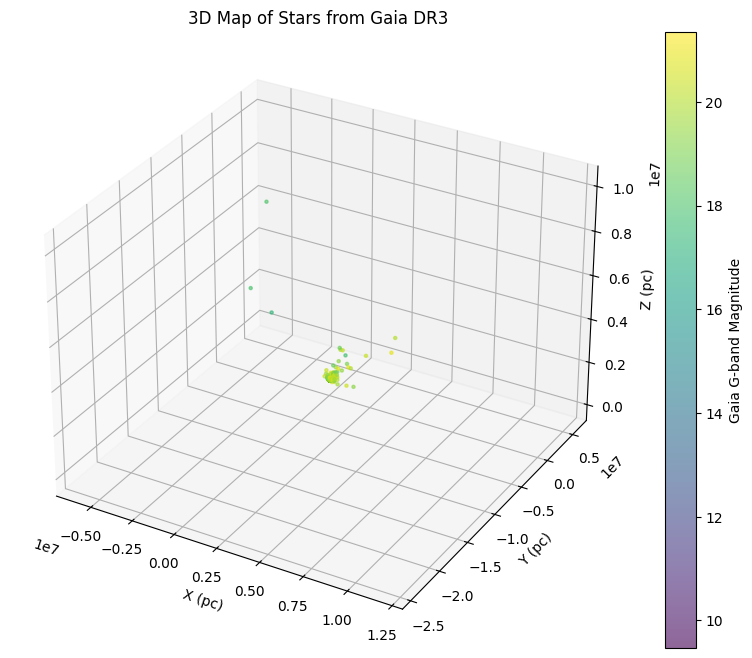

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the Gaia DR3 data (Ensure the file path is correct)
data = pd.read_csv("D:/Desktop/PROJECT/data/raw/Gaia_DR3-2025-02-19-07-45-37-759132.csv")

# Filter out rows with missing or invalid parallax values (negative or zero)
data = data[data['parallax'] > 0]

# Convert parallax (in milliarcseconds) to distance (in parsecs)
data['distance'] = 1000 / data['parallax']  # Convert milliarcseconds to arcseconds

# Convert RA, Dec, and distance to Cartesian coordinates
ra_rad = np.deg2rad(data['ra'])  # Convert right ascension to radians
dec_rad = np.deg2rad(data['dec'])  # Convert declination to radians

data['x'] = data['distance'] * np.cos(dec_rad) * np.cos(ra_rad)
data['y'] = data['distance'] * np.cos(dec_rad) * np.sin(ra_rad)
data['z'] = data['distance'] * np.sin(dec_rad)

# Plot the 3D map
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of stars, coloring by their brightness (phot_g_mean_mag)
sc = ax.scatter(data['x'], data['y'], data['z'], c=data['phot_g_mean_mag'], cmap='viridis', s=5, alpha=0.6)

# Labels and title
ax.set_xlabel("X (pc)")
ax.set_ylabel("Y (pc)")
ax.set_zlabel("Z (pc)")
ax.set_title("3D Map of Stars from Gaia DR3")

# Add color bar to show brightness scale
plt.colorbar(sc, label='Gaia G-band Magnitude')

# Show plot
plt.show()
